# Explore here

It's recommended to use this notebook for exploration purposes.

In [20]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


response = requests.get("https://www.mlb.com/stats/san-francisco-giants/all-time-by-season")
print(response.status_code)


200


In [21]:
if response.status_code == 200:

    # You need to parse the response to get the HTML text
    html_data = BeautifulSoup(response.text, 'html')
else:
    
    # If request is not authorized, then print error message
    print("Uh-oh request was not authorized. Could not retrieve the desired information.")
print(html_data)


<!DOCTYPE html>

<html lang="en">
<head>
<script defer="" id="dd-rum">
          (() => {
            try {
              if (!window.DD_RUM) {
              (function(h, o, u, n, d) {
                h = h[d] = h[d] || {
                q: [],
                onReady: function(c) {
                  h.q.push(c)
                }
                };
                d = o.createElement(u);
                d.async = 1;
                d.src = n;
                n = o.getElementsByTagName(u)[0];
                n.parentNode.insertBefore(d, n);
              })(window, document, 'script', 'https://www.datadoghq-browser-agent.com/us5/v5/datadog-rum.js', 'DD_RUM');
            
              window.DD_RUM.onReady(function() {
                window.DD_RUM.init({
                clientToken: 'pub2f3dc9177dc1ca6578d39de100cf518a',
                applicationId: 'a1f66b08-04df-4cc1-9312-c6ce7c336486',
                site: 'us5.datadoghq.com',
                service: 'web--mlb.com',
           

In [22]:
soup = html_data


tables = soup.find_all('table')

tables

print(type(tables))

print(f"The total number of tables is: {len(tables)}")

table = tables[0]

columns = []

abbr_elements = table.find_all("abbr", "bui-text cellheader bui-text")
abbr_elements_final = table.find_all("abbr", "bui-text cellheader selected-1vxxHvFg bui-text")
updated_abbr_list = abbr_elements + abbr_elements_final
for abbr in updated_abbr_list:
    
    # get the column label
    column_label = abbr.text.strip()

    # add the column label to the list if it's not already in the list to avoid duplicates
    if column_label not in columns:
        columns.append(column_label)
columns



<class 'bs4.element.ResultSet'>
The total number of tables is: 1


['PLAYER',
 'YEAR',
 'TEAM',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'SB',
 'CS',
 'AVG',
 'OBP',
 'SLG']

In [23]:
# although the 'OPS' title has the same key and class (i quadruple checked), it wont come up so i added it manually
columns.append('OPS')
columns

['PLAYER',
 'YEAR',
 'TEAM',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'SB',
 'CS',
 'AVG',
 'OBP',
 'SLG',
 'OPS']

In [24]:
all_rows = []

tr_tags = table.find_all("tr")

# we will need to obtain each tr tag by inserting a for loop
for tr in tr_tags[1:]:

    # need to append the data for the row to this list
    row = []


    # we need to extract the player names for each row, noting they are under the <span> elements
    player_span = tr.find_all("span", class_="short-IiSPVSQp")

    # join the text in all <span> elements to form the player name
    player_name = ' '.join(span.text for span in player_span)

    # append player_name to 'row'
    row.append(player_name)

    # get other row elements and append to row
    other_row_elements = [row.append(td.text.strip()) for td in tr.find_all('td')]

    # append 'row' to 'all_rows'
    all_rows.append(row)
all_rows




[['B Bonds',
  '2004',
  'SF',
  '147',
  '373',
  '129',
  '135',
  '27',
  '3',
  '45',
  '101',
  '232',
  '41',
  '6',
  '1',
  '.362',
  '.609',
  '.812',
  '1.421'],
 ['B Bonds',
  '2002',
  'SF',
  '143',
  '403',
  '117',
  '149',
  '31',
  '2',
  '46',
  '110',
  '198',
  '47',
  '9',
  '2',
  '.370',
  '.582',
  '.799',
  '1.381'],
 ['B Bonds',
  '2001',
  'SF',
  '153',
  '476',
  '129',
  '156',
  '32',
  '2',
  '73',
  '137',
  '177',
  '93',
  '13',
  '3',
  '.328',
  '.515',
  '.863',
  '1.378'],
 ['B Bonds',
  '2003',
  'SF',
  '130',
  '390',
  '111',
  '133',
  '22',
  '1',
  '45',
  '90',
  '148',
  '58',
  '7',
  '0',
  '.341',
  '.529',
  '.749',
  '1.278'],
 ['B Bonds',
  '1993',
  'SF',
  '159',
  '539',
  '129',
  '181',
  '38',
  '4',
  '46',
  '123',
  '126',
  '79',
  '29',
  '12',
  '.336',
  '.458',
  '.677',
  '1.135'],
 ['B Bonds',
  '2000',
  'SF',
  '143',
  '480',
  '129',
  '147',
  '28',
  '4',
  '49',
  '106',
  '117',
  '77',
  '11',
  '3',
  '.306

In [25]:
import pandas as pd

df = pd.DataFrame(all_rows, columns=columns)

df


,PLAYER,YEAR,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,B Bonds,2004,SF,147,373,129,135,27,3,45,101,232,41,6,1,.362,.609,.812,1.421
1,B Bonds,2002,SF,143,403,117,149,31,2,46,110,198,47,9,2,.370,.582,.799,1.381
2,B Bonds,2001,SF,153,476,129,156,32,2,73,137,177,93,13,3,.328,.515,.863,1.378
3,B Bonds,2003,SF,130,390,111,133,22,1,45,90,148,58,7,0,.341,.529,.749,1.278
4,B Bonds,1993,SF,159,539,129,181,38,4,46,123,126,79,29,12,.336,.458,.677,1.135
5,B Bonds,2000,SF,143,480,129,147,28,4,49,106,117,77,11,3,.306,.440,.688,1.128
6,W McCovey,1969,SF,149,491,101,157,26,2,45,126,121,66,0,0,.320,.453,.656,1.109
7,M Ott,1929,NYG,150,545,138,179,37,2,42,151,113,38,6,--,.328,.449,.635,1.084
8,W Mays,1954,NYG,151,565,119,195,33,13,41,110,66,57,8,5,.345,.411,.667,1.078
9,B Bonds,1996,SF,158,517,122,159,27,3,42,129,151,76,40,7,.308,.461,.615,1.076


In [26]:
# Save the DataFrame to a CSV file
df.to_csv('html_data.csv', index=False)

print("Table data has been saved to 'html_data.csv'")

print(df.columns)


Table data has been saved to 'html_data.csv'
Index(['PLAYER', 'YEAR', 'TEAM', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'OPS'],
      dtype='object')


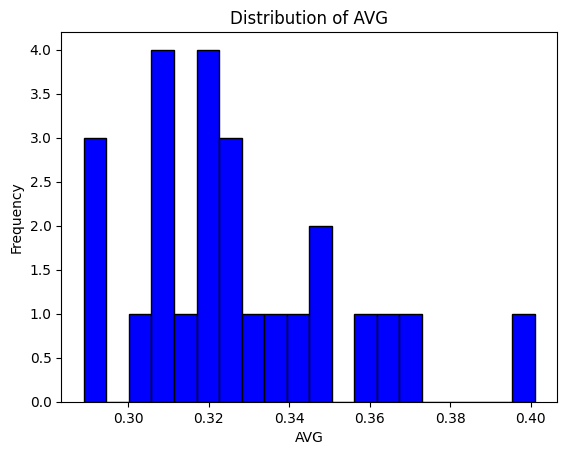

In [27]:
'''Step 5: Visualize the data
What types of visualizations can we make using our DataFrame? Create at least 3 data
visualizations (ex: line plot, histogram, scatter plot, etc.). There are two examples of histograms provided.
'''
import matplotlib.pyplot as plt
# print our DataFrame to inspect the data
df
# # Convert the 'AVG' column to a numerical data type, if not already
df['AVG'] = pd.to_numeric(df['AVG'], errors='coerce')
# Create a histogram
plt.hist(df['AVG'].dropna(), bins=20, color='blue', edgecolor='black')
plt.title('Distribution of AVG')
plt.xlabel('AVG')
plt.ylabel('Frequency')
# Display the histogram
plt.show()

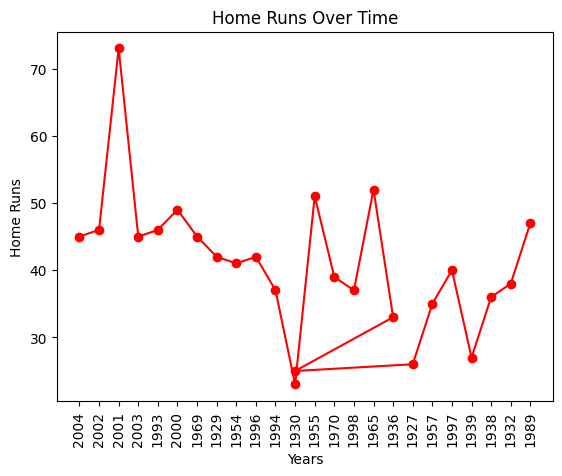

In [28]:

# Ensure hr_series is converted to float
hr_series = df['HR'].astype(float)
year = df['YEAR']
# Create a line plot for 'hr'
plt.plot(year, hr_series, marker='o', linestyle='-', color='red')
# Adding titles and labels
plt.title('Home Runs Over Time')
plt.xlabel('Years')  # Adjust based on what the index represents
plt.ylabel('Home Runs')
plt.xticks(rotation=90)
plt.tight_layout
# Show plot
plt.show()

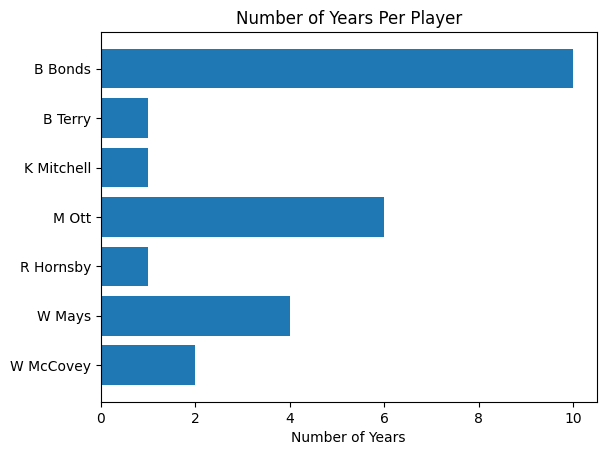

In [30]:
import numpy as np


# Group by player and count unique years
year_counts = df.groupby('PLAYER')['YEAR'].nunique().reset_index()

# Extract player names and year counts
players = year_counts['PLAYER']
years = year_counts['YEAR']

# Create a horizontal bar plot
fig, ax = plt.subplots()

y_pos = np.arange(len(players))

ax.barh(y_pos, years, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(players)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Years')
ax.set_title('Number of Years Per Player')

plt.show()

